In [9]:
%pip install sklearn
%pip install seaborn
%pip install shap --user
%pip install mlxtend --user

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from IPython.display import Image 

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.inspection import permutation_importance


from mlxtend.plotting import plot_decision_regions

import math

In [11]:
def get_results(truth, prediction):
    
    y_test2 = truth
    y_pred2 = pd.Series(prediction)


    acc = accuracy_score(y_test2, y_pred2)
    f1 = f1_score(y_test2, y_pred2)
    precision = precision_score(y_test2, y_pred2)
    recall = recall_score(y_test2, y_pred2)

    scores = [acc, f1, precision, recall]

    return scores

# 1 year + comorbidities

In [27]:
com_train1 = pd.read_csv('/rds/general/project/hda_students_data/live/Group7/General/Final/Model_dataset/train1.csv')
com_test1 = pd.read_csv('/rds/general/project/hda_students_data/live/Group7/General/Final/Model_dataset/test1.csv')

In [5]:
X_train = com_train1.iloc[:,1:]
y_train = com_train1.iloc[:,:1]
X_test = com_test1.iloc[:,1:]
y_test = com_test1.iloc[:,:1]

parameters = {'max_features':['sqrt'], 'n_estimators':[50,100,250],
              'max_depth':range(2,7),'min_samples_leaf':[2,4,6,8], 
              'criterion' :['gini', 'entropy']}

rf_class = GridSearchCV(RandomForestClassifier(random_state = 8),
                        parameters, n_jobs=3)
rf_class.fit(X=X_train, y=y_train)
rf_model = rf_class.best_estimator_

y_pred = rf_model.predict(X_test)


results = get_results(y_test, y_pred)


print('The best parameters are {}'.format(rf_class.best_params_))
print(results)

/rds/general/user/lr4017/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


The best parameters are {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'n_estimators': 250}
[0.5750696933492633, 0.40689271817676487, 0.6734130634774609, 0.2915173237753883]


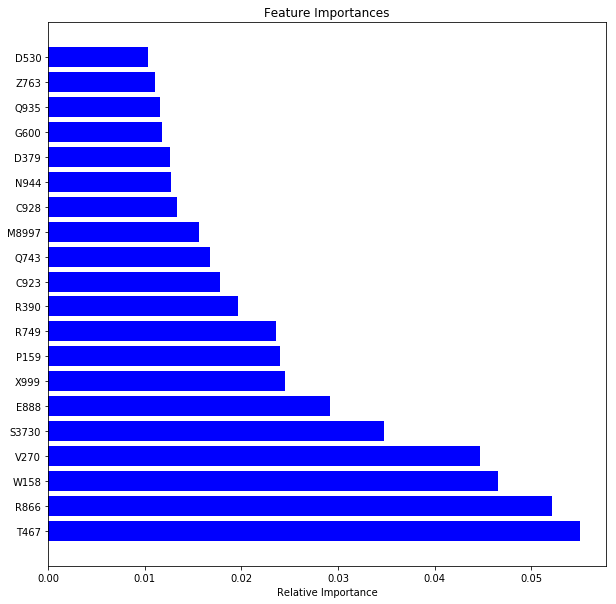

In [6]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)
imp_ind = []
for i in range(len(importances)):
    imp_ind.append((importances[i], indices[i]))
ordered_imp_ind = sorted(imp_ind, key=lambda x: x[0], reverse = True)
ordered_features = []
for i in range(len(ordered_imp_ind)):
    ordered_features.append(X_train.columns[ordered_imp_ind[i][1]])

ordered_importances = []
for i in range(len(ordered_imp_ind)):
    ordered_importances.append(ordered_imp_ind[i][0])

best_features = ordered_features[:20]
best_importances = ordered_importances[:20]
best_indices = list(range(0, 20))

best_feat_df = pd.DataFrame(best_features)
best_feat_df.to_csv('/rds/general/project/hda_students_data/live/Group7/General/Final/best_features_1_com_RF.csv')

plt.figure(figsize= (10,10))
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(best_indices)), best_importances, color='b',
         align='center')
plt.yticks(range(len(best_indices)), [best_features[i] for i in best_indices])
plt.xlabel('Relative Importance')
plt.show()

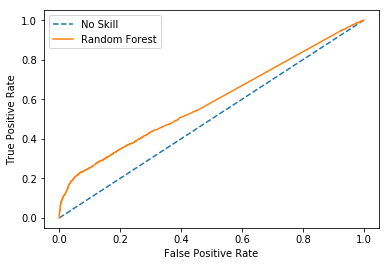

AUC is 0.5873342280029201


In [8]:
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
probs = rf_model.predict_proba(X_test)
probs = probs[:, 1]
ns_probs = [0 for _ in range(len(y_test))]
fpr, tpr, _ = roc_curve(y_test, probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='', label='Random Forest')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()
print('AUC is {}'.format(auc(fpr, tpr)))

In [ ]:
hhhvvvhbbbhbbb

# 5 years + comorbidities

In [9]:
com_train5 = pd.read_csv('/rds/general/project/hda_students_data/live/Group7/General/Final/Model_dataset/train5.csv')
com_test5 = pd.read_csv('/rds/general/project/hda_students_data/live/Group7/General/Final/Model_dataset/test5.csv')

In [10]:
X_train = com_train5.iloc[:,1:]
y_train = com_train5.iloc[:,:1]
X_test = com_test5.iloc[:,1:]
y_test = com_test5.iloc[:,:1]

parameters = {'max_features':['sqrt'], 'n_estimators':[50,100,250],
              'max_depth':range(2,7),'min_samples_leaf':[2,4,6,8], 
              'criterion' :['gini', 'entropy']}

rf_class = GridSearchCV(RandomForestClassifier(random_state = 8),
                        parameters, n_jobs=3)
rf_class.fit(X=X_train, y=y_train)
rf_model = rf_class.best_estimator_

y_pred = rf_model.predict(X_test)


results = get_results(y_test, y_pred)


print('The best parameters are {}'.format(rf_class.best_params_))
print(results)

/rds/general/user/lr4017/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


The best parameters are {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'n_estimators': 250}
[0.5450019912385504, 0.3271495877502945, 0.6276836158192091, 0.22122660294703306]


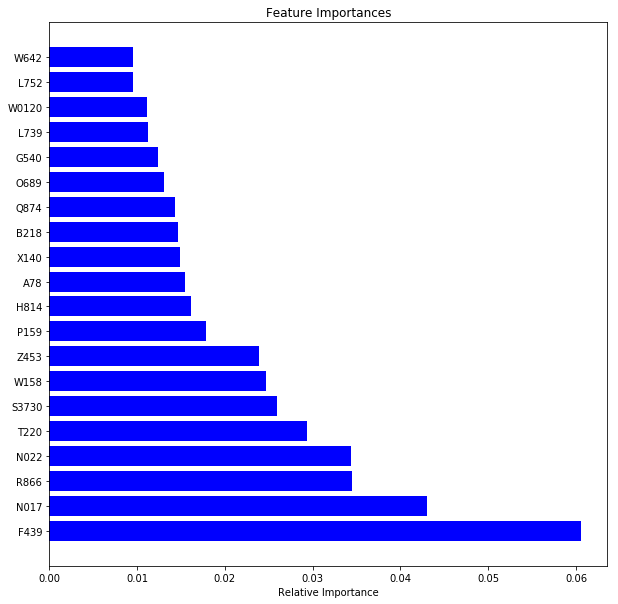

In [11]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)
imp_ind = []
for i in range(len(importances)):
    imp_ind.append((importances[i], indices[i]))
ordered_imp_ind = sorted(imp_ind, key=lambda x: x[0], reverse = True)
ordered_features = []
for i in range(len(ordered_imp_ind)):
    ordered_features.append(X_train.columns[ordered_imp_ind[i][1]])

ordered_importances = []
for i in range(len(ordered_imp_ind)):
    ordered_importances.append(ordered_imp_ind[i][0])

best_features = ordered_features[:20]
best_importances = ordered_importances[:20]
best_indices = list(range(0, 20))

best_feat_df = pd.DataFrame(best_features)
best_feat_df.to_csv('/rds/general/project/hda_students_data/live/Group7/General/Final/best_features_5_com_RF.csv')

plt.figure(figsize= (10,10))
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(best_indices)), best_importances, color='b',
         align='center')
plt.yticks(range(len(best_indices)), [best_features[i] for i in best_indices])
plt.xlabel('Relative Importance')
plt.show()

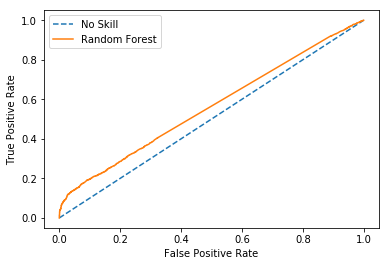

AUC is 0.5609105281246782


In [12]:
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
probs = rf_model.predict_proba(X_test)
probs = probs[:, 1]
ns_probs = [0 for _ in range(len(y_test))]
fpr, tpr, _ = roc_curve(y_test, probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='', label='Random Forest')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()
print('AUC is {}'.format(auc(fpr, tpr)))

In [ ]:
hhjjjkkbbbbhvvvhhhyyyynnnttthhhhhhoohhjjllhhhi

# covariates

In [13]:
cov_train = pd.read_csv('/rds/general/project/hda_students_data/live/Group7/General/Final/Model_dataset/covariates_train.csv')
cov_test = pd.read_csv('/rds/general/project/hda_students_data/live/Group7/General/Final/Model_dataset/covariates_test.csv')

In [14]:
X_train = cov_train.iloc[:,1:]
y_train = cov_train.iloc[:,:1]
X_test = cov_test.iloc[:,1:]
y_test = cov_test.iloc[:,:1]

parameters = {'max_features':['sqrt'], 'n_estimators':[50,100,250],
              'max_depth':range(2,7),'min_samples_leaf':[2,4,6,8], 
              'criterion' :['gini', 'entropy']}

rf_class = GridSearchCV(RandomForestClassifier(random_state = 8),
                        parameters, n_jobs=3)
rf_class.fit(X=X_train, y=y_train)
rf_model = rf_class.best_estimator_

y_pred = rf_model.predict(X_test)


results = get_results(y_test, y_pred)


print('The best parameters are {}'.format(rf_class.best_params_))
print(results)

/rds/general/user/lr4017/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


The best parameters are {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 50}
[0.5648148148148148, 0.5768225384838803, 0.5613340870548332, 0.5931899641577061]


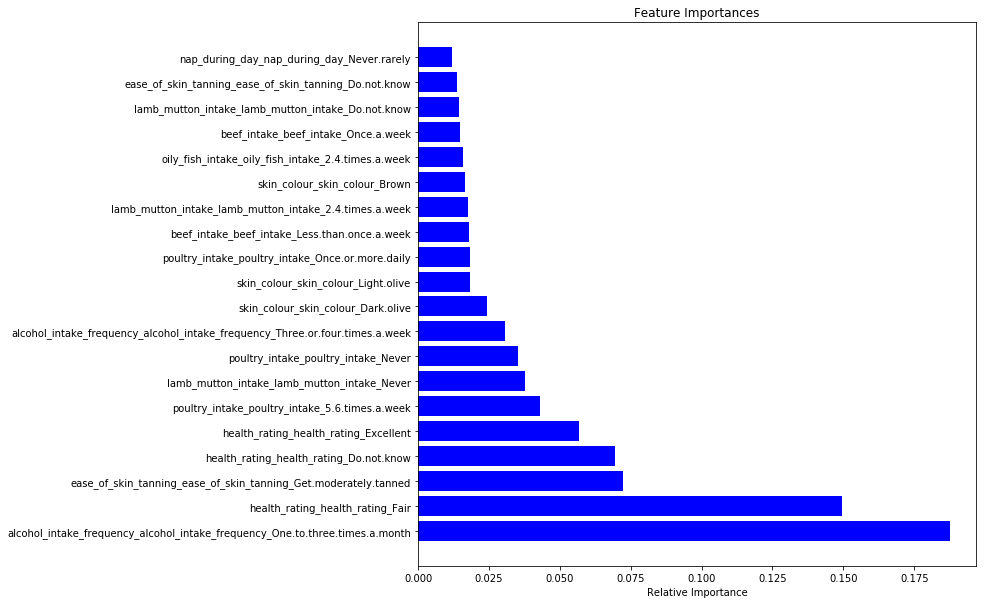

In [15]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)
imp_ind = []
for i in range(len(importances)):
    imp_ind.append((importances[i], indices[i]))
ordered_imp_ind = sorted(imp_ind, key=lambda x: x[0], reverse = True)
ordered_features = []
for i in range(len(ordered_imp_ind)):
    ordered_features.append(X_train.columns[ordered_imp_ind[i][1]])

ordered_importances = []
for i in range(len(ordered_imp_ind)):
    ordered_importances.append(ordered_imp_ind[i][0])

best_features = ordered_features[:20]
best_importances = ordered_importances[:20]
best_indices = list(range(0, 20))

best_feat_df = pd.DataFrame(best_features)
best_feat_df.to_csv('/rds/general/project/hda_students_data/live/Group7/General/Final/best_features_cov_RF.csv')

plt.figure(figsize= (10,10))
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(best_indices)), best_importances, color='b',
         align='center')
plt.yticks(range(len(best_indices)), [best_features[i] for i in best_indices])
plt.xlabel('Relative Importance')
plt.show()

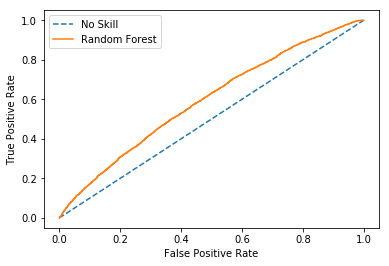

AUC is 0.5945783792253947


In [17]:
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
probs = rf_model.predict_proba(X_test)
probs = probs[:, 1]
ns_probs = [0 for _ in range(len(y_test))]
fpr, tpr, _ = roc_curve(y_test, probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='', label='Random Forest')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()
print('AUC is {}'.format(auc(fpr, tpr)))

Create a function to get accuracy, f1 score, precision and recall

Splitting between training and test set

Running the random forest with a grid search to find the optimal parameters

Getting the 20 most important features

In [ ]:
result = permutation_importance(rf_model, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize = (10,10))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

Similar approaches for other type of data

# 1 year + comorbidities and covariates

In [28]:
com_cov_train1 = pd.read_csv('/rds/general/project/hda_students_data/live/Group7/General/Final/Model_dataset/comorbidities_covariates_train1.csv')
com_cov_test1 = pd.read_csv('/rds/general/project/hda_students_data/live/Group7/General/Final/Model_dataset/comorbidities_covariates_test1.csv')

In [6]:
X_train = com_cov_train1.iloc[:,1:]
y_train = com_cov_train1.iloc[:,:1]
X_test = com_cov_test1.iloc[:,1:]
y_test = com_cov_test1.iloc[:,:1]

parameters = {'max_features':['sqrt'], 'n_estimators':[50,100,250],
              'max_depth':range(2,7),'min_samples_leaf':[2,4,6,8], 
              'criterion' :['gini', 'entropy']}

rf_class = GridSearchCV(RandomForestClassifier(random_state = 8),
                        parameters, n_jobs=3)
rf_class.fit(X=X_train, y=y_train)
rf_model = rf_class.best_estimator_

y_pred = rf_model.predict(X_test)


results = get_results(y_test, y_pred)


print('The best parameters are {}'.format(rf_class.best_params_))
print(results)

/rds/general/user/lr4017/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


The best parameters are {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 250}
[0.6011549183592194, 0.5768905787917195, 0.6142600089968511, 0.5438072481083234]


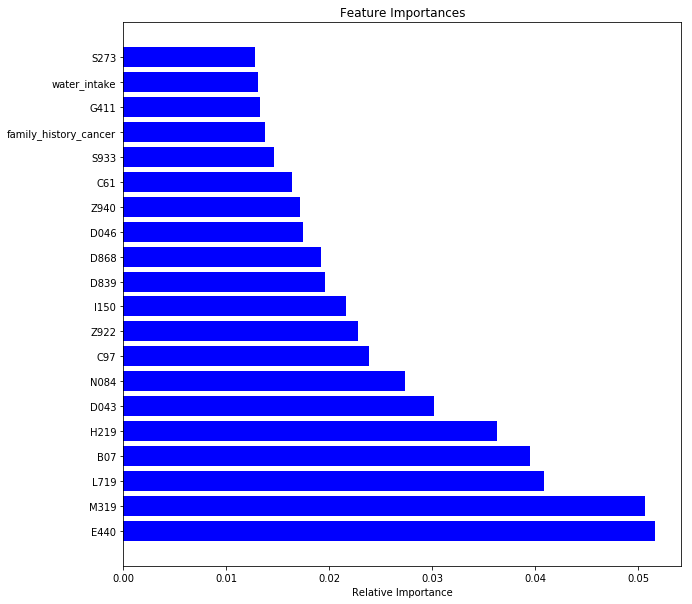

In [7]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)
imp_ind = []
for i in range(len(importances)):
    imp_ind.append((importances[i], indices[i]))
ordered_imp_ind = sorted(imp_ind, key=lambda x: x[0], reverse = True)
ordered_features = []
for i in range(len(ordered_imp_ind)):
    ordered_features.append(X_train.columns[ordered_imp_ind[i][1]])

ordered_importances = []
for i in range(len(ordered_imp_ind)):
    ordered_importances.append(ordered_imp_ind[i][0])

best_features = ordered_features[:20]
best_importances = ordered_importances[:20]
best_indices = list(range(0, 20))

best_feat_df = pd.DataFrame(best_features)
best_feat_df.to_csv('/rds/general/project/hda_students_data/live/Group7/General/Final/best_features_1_comcovbio_RF.csv')

plt.figure(figsize= (10,10))
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(best_indices)), best_importances, color='b',
         align='center')
plt.yticks(range(len(best_indices)), [best_features[i] for i in best_indices])
plt.xlabel('Relative Importance')
plt.show()

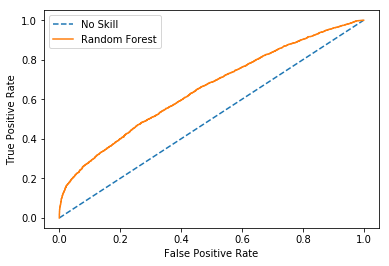

AUC is 0.6509109817242207


In [22]:
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
probs = rf_model.predict_proba(X_test)
probs = probs[:, 1]
ns_probs = [0 for _ in range(len(y_test))]
fpr, tpr, _ = roc_curve(y_test, lr_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='', label='Random Forest')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()
print('AUC is {}'.format(auc(fpr, tpr)))

# 5 year + comorbidities and covariates

In [8]:
com_cov_train5 = pd.read_csv('/rds/general/project/hda_students_data/live/Group7/General/Final/Model_dataset/comorbidities_covariates_train5.csv')
com_cov_test5 = pd.read_csv('/rds/general/project/hda_students_data/live/Group7/General/Final/Model_dataset/comorbidities_covariates_test5.csv')

In [9]:
X_train = com_cov_train5.iloc[:,1:]
y_train = com_cov_train5.iloc[:,:1]
X_test = com_cov_test5.iloc[:,1:]
y_test = com_cov_test5.iloc[:,:1]

parameters = {'max_features':['sqrt'], 'n_estimators':[50,100,250],
              'max_depth':range(2,7),'min_samples_leaf':[2,4,6,8], 
              'criterion' :['gini', 'entropy']}

rf_class = GridSearchCV(RandomForestClassifier(random_state = 8),
                        parameters, n_jobs=3)
rf_class.fit(X=X_train, y=y_train)
rf_model = rf_class.best_estimator_

y_pred = rf_model.predict(X_test)


results = get_results(y_test, y_pred)


print('The best parameters are {}'.format(rf_class.best_params_))
print(results)

/rds/general/user/lr4017/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


The best parameters are {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 250}
[0.5818399044205496, 0.5843230403800475, 0.5808736717827627, 0.5878136200716846]


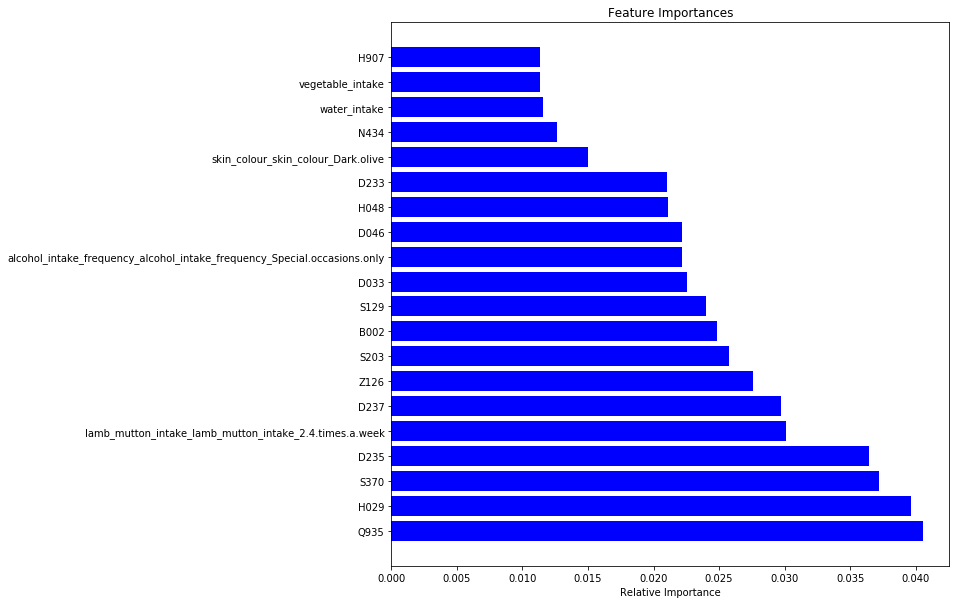

In [10]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)
imp_ind = []
for i in range(len(importances)):
    imp_ind.append((importances[i], indices[i]))
ordered_imp_ind = sorted(imp_ind, key=lambda x: x[0], reverse = True)
ordered_features = []
for i in range(len(ordered_imp_ind)):
    ordered_features.append(X_train.columns[ordered_imp_ind[i][1]])

ordered_importances = []
for i in range(len(ordered_imp_ind)):
    ordered_importances.append(ordered_imp_ind[i][0])

best_features = ordered_features[:20]
best_importances = ordered_importances[:20]
best_indices = list(range(0, 20))

best_feat_df = pd.DataFrame(best_features)
best_feat_df.to_csv('/rds/general/project/hda_students_data/live/Group7/General/Final/best_features_1_comcovbio_RF.csv')

plt.figure(figsize= (10,10))
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(best_indices)), best_importances, color='b',
         align='center')
plt.yticks(range(len(best_indices)), [best_features[i] for i in best_indices])
plt.xlabel('Relative Importance')
plt.show()

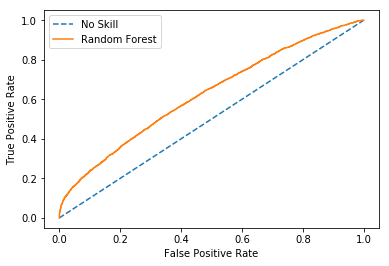

AUC is 0.6250550346297874


In [12]:
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
probs = rf_model.predict_proba(X_test)
probs = probs[:, 1]
ns_probs = [0 for _ in range(len(y_test))]
fpr, tpr, _ = roc_curve(y_test, probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='', label='Random Forest')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()
print('AUC is {}'.format(auc(fpr, tpr)))

# 1 year + comorbities, covariates, biomarkers

In [18]:
com_cov_bio_train1 = pd.read_csv('/rds/general/project/hda_students_data/live/Group7/General/Final/Model_dataset/comorbidities_covariates_bio_train1.csv')
com_cov_bio_test1 = pd.read_csv('/rds/general/project/hda_students_data/live/Group7/General/Final/Model_dataset/comorbidities_bio_covariates_test1.csv')

In [19]:
X_train = com_cov_bio_train1.iloc[:,1:]
y_train = com_cov_bio_train1.iloc[:,:1]
X_test = com_cov_bio_test1.iloc[:,1:]
y_test = com_cov_bio_test1.iloc[:,:1]

parameters = {'max_features':['sqrt'], 'n_estimators':[50,100,250],
              'max_depth':range(2,7),'min_samples_leaf':[2,4,6,8], 
              'criterion' :['gini', 'entropy']}

rf_class = GridSearchCV(RandomForestClassifier(random_state = 8),
                        parameters, n_jobs=3)
rf_class.fit(X=X_train, y=y_train)
rf_model = rf_class.best_estimator_

y_pred = rf_model.predict(X_test)


results = get_results(y_test, y_pred)


print('The best parameters are {}'.format(rf_class.best_params_))
print(results)

/rds/general/user/lr4017/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


The best parameters are {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'n_estimators': 250}
[0.6139848935683223, 0.581149882031541, 0.6351791530944625, 0.5355916685740444]


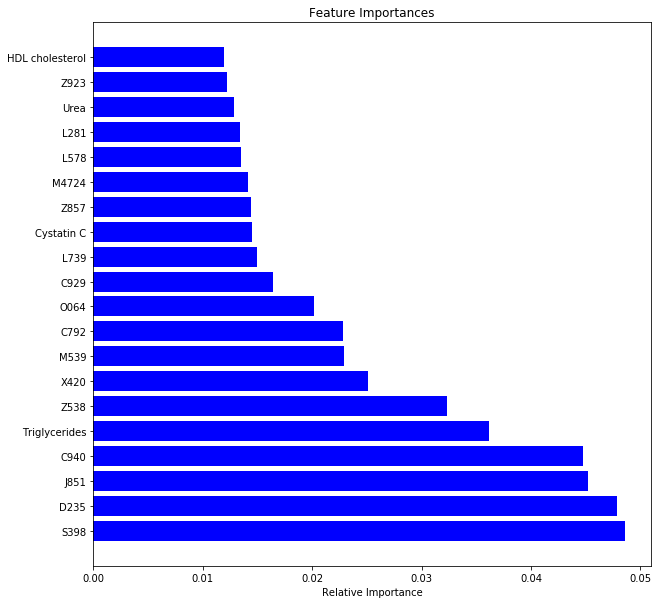

In [20]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)
imp_ind = []
for i in range(len(importances)):
    imp_ind.append((importances[i], indices[i]))
ordered_imp_ind = sorted(imp_ind, key=lambda x: x[0], reverse = True)
ordered_features = []
for i in range(len(ordered_imp_ind)):
    ordered_features.append(X_train.columns[ordered_imp_ind[i][1]])

ordered_importances = []
for i in range(len(ordered_imp_ind)):
    ordered_importances.append(ordered_imp_ind[i][0])

best_features = ordered_features[:20]
best_importances = ordered_importances[:20]
best_indices = list(range(0, 20))

best_feat_df = pd.DataFrame(best_features)
best_feat_df.to_csv('/rds/general/project/hda_students_data/live/Group7/General/Final/best_features_1_comcovbio_RF.csv')

plt.figure(figsize= (10,10))
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(best_indices)), best_importances, color='b',
         align='center')
plt.yticks(range(len(best_indices)), [best_features[i] for i in best_indices])
plt.xlabel('Relative Importance')
plt.show()

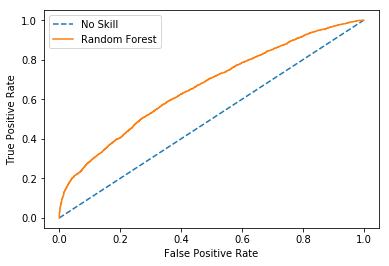

AUC is 0.6645662198679065


In [21]:
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
probs = rf_model.predict_proba(X_test)
probs = probs[:, 1]
ns_probs = [0 for _ in range(len(y_test))]
fpr, tpr, _ = roc_curve(y_test, probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='', label='Random Forest')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()
print('AUC is {}'.format(auc(fpr, tpr)))

# 5 years + comorbidities, covariates, biomarkers

In [22]:
com_cov_bio_train5 = pd.read_csv('/rds/general/project/hda_students_data/live/Group7/General/Final/Model_dataset/comorbidities_covariates_bio_train5.csv')
com_cov_bio_test5 = pd.read_csv('/rds/general/project/hda_students_data/live/Group7/General/Final/Model_dataset/comorbidities_bio_covariates_test5.csv')

In [23]:
X_train = com_cov_bio_train5.iloc[:,1:]
y_train = com_cov_bio_train5.iloc[:,:1]
X_test = com_cov_bio_test5.iloc[:,1:]
y_test = com_cov_bio_test5.iloc[:,:1]

parameters = {'max_features':['sqrt'], 'n_estimators':[50,100,250],
              'max_depth':range(2,7),'min_samples_leaf':[2,4,6,8], 
              'criterion' :['gini', 'entropy']}

rf_class = GridSearchCV(RandomForestClassifier(random_state = 8),
                        parameters, n_jobs=3)
rf_class.fit(X=X_train, y=y_train)
rf_model = rf_class.best_estimator_

y_pred = rf_model.predict(X_test)


results = get_results(y_test, y_pred)


print('The best parameters are {}'.format(rf_class.best_params_))
print(results)

/rds/general/user/lr4017/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


The best parameters are {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 250}
[0.5952162966353857, 0.5819643068195248, 0.6016617790811339, 0.5635156786449989]


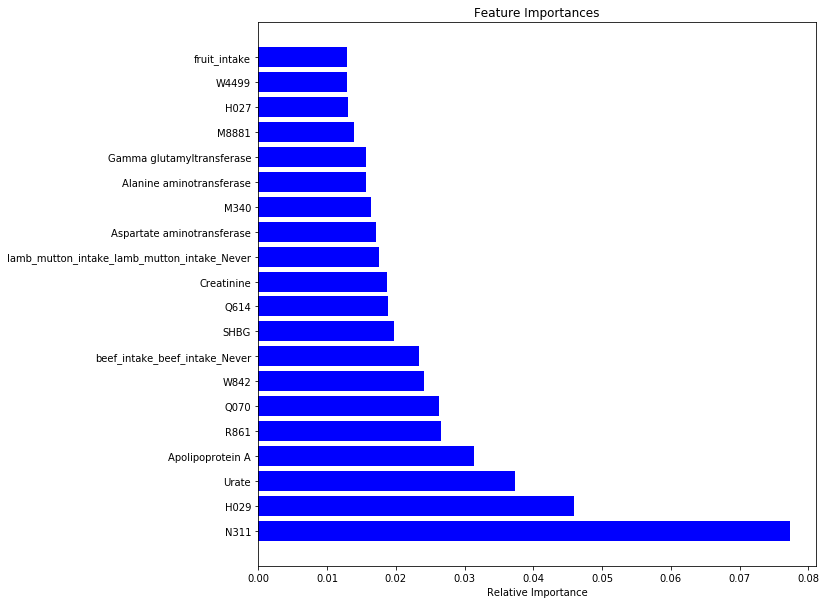

In [24]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)
imp_ind = []
for i in range(len(importances)):
    imp_ind.append((importances[i], indices[i]))
ordered_imp_ind = sorted(imp_ind, key=lambda x: x[0], reverse = True)
ordered_features = []
for i in range(len(ordered_imp_ind)):
    ordered_features.append(X_train.columns[ordered_imp_ind[i][1]])

ordered_importances = []
for i in range(len(ordered_imp_ind)):
    ordered_importances.append(ordered_imp_ind[i][0])

best_features = ordered_features[:20]
best_importances = ordered_importances[:20]
best_indices = list(range(0, 20))

best_feat_df = pd.DataFrame(best_features)
best_feat_df.to_csv('/rds/general/project/hda_students_data/live/Group7/General/Final/best_features_5_comcovbio_RF.csv')

plt.figure(figsize= (10,10))
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(best_indices)), best_importances, color='b',
         align='center')
plt.yticks(range(len(best_indices)), [best_features[i] for i in best_indices])
plt.xlabel('Relative Importance')
plt.show()

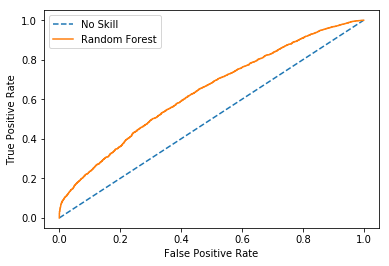

AUC is 0.6390828325473574


In [25]:
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
probs = rf_model.predict_proba(X_test)
probs = probs[:, 1]
ns_probs = [0 for _ in range(len(y_test))]
fpr, tpr, _ = roc_curve(y_test, probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='', label='Random Forest')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()
print('AUC is {}'.format(auc(fpr, tpr)))

# Sensitivity analysis 1 comorbidities

In [29]:
sa_com_train1 = pd.read_csv('/rds/general/project/hda_students_data/live/Group7/General/Final/Sensitivity_analysis/filt_train1.csv')
sa_com_test1 = pd.read_csv('/rds/general/project/hda_students_data/live/Group7/General/Final/Sensitivity_analysis/filt_test1.csv')

In [10]:
sa_com_train1 = sa_com_train1.drop(['eid'], axis = 1)
sa_com_test1 = sa_com_test1.drop(['eid'], axis = 1)

In [11]:
X_train = sa_com_train1.iloc[:,1:]
y_train = sa_com_train1.iloc[:,:1]
X_test = sa_com_test1.iloc[:,1:]
y_test = sa_com_test1.iloc[:,:1]

parameters = {'max_features':['sqrt'], 'n_estimators':[50,100,250],
              'max_depth':range(2,7),'min_samples_leaf':[2,4,6,8], 
              'criterion' :['gini', 'entropy']}

rf_class = GridSearchCV(RandomForestClassifier(random_state = 8),
                        parameters, n_jobs=3)
rf_class.fit(X=X_train, y=y_train)
rf_model = rf_class.best_estimator_

y_pred = rf_model.predict(X_test)


results = get_results(y_test, y_pred)


print('The best parameters are {}'.format(rf_class.best_params_))
print(results)

/rds/general/user/lr4017/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


The best parameters are {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'n_estimators': 250}
[0.5336916622968012, 0.2777664974619289, 0.6156615661566157, 0.1793392763502884]


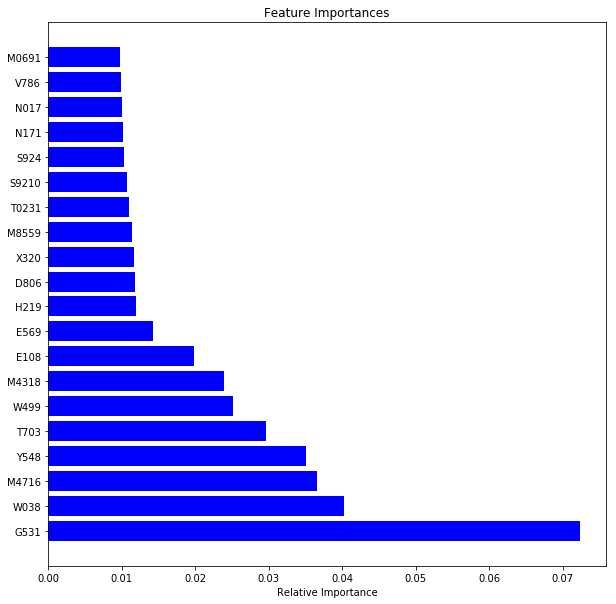

In [12]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)
imp_ind = []
for i in range(len(importances)):
    imp_ind.append((importances[i], indices[i]))
ordered_imp_ind = sorted(imp_ind, key=lambda x: x[0], reverse = True)
ordered_features = []
for i in range(len(ordered_imp_ind)):
    ordered_features.append(X_train.columns[ordered_imp_ind[i][1]])

ordered_importances = []
for i in range(len(ordered_imp_ind)):
    ordered_importances.append(ordered_imp_ind[i][0])

best_features = ordered_features[:20]
best_importances = ordered_importances[:20]
best_indices = list(range(0, 20))

best_feat_df = pd.DataFrame(best_features)
best_feat_df.to_csv('/rds/general/project/hda_students_data/live/Group7/General/Final/best_features_1_sa_com_RF.csv')

plt.figure(figsize= (10,10))
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(best_indices)), best_importances, color='b',
         align='center')
plt.yticks(range(len(best_indices)), [best_features[i] for i in best_indices])
plt.xlabel('Relative Importance')
plt.show()

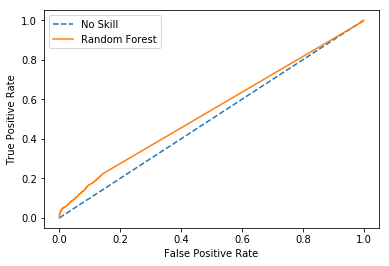

AUC is 0.5408237776040526


In [13]:
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
probs = rf_model.predict_proba(X_test)
probs = probs[:, 1]
ns_probs = [0 for _ in range(len(y_test))]
fpr, tpr, _ = roc_curve(y_test, probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='', label='Random Forest')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()
print('AUC is {}'.format(auc(fpr, tpr)))

# Sensitivity analysis 1-5 comorbidities 

In [32]:
sa_com_train15 = pd.read_csv('/rds/general/project/hda_students_data/live/Group7/General/Final/Sensitivity_analysis/filt_train15.csv')
sa_com_test15 = pd.read_csv('/rds/general/project/hda_students_data/live/Group7/General/Final/Sensitivity_analysis/filt_test15.csv')

In [19]:
sa_com_train15 = sa_com_train15.drop(['eid'], axis = 1)
sa_com_test15 = sa_com_test15.drop(['eid'], axis = 1)

In [20]:
X_train = sa_com_train15.iloc[:,1:]
y_train = sa_com_train15.iloc[:,:1]
X_test = sa_com_test15.iloc[:,1:]
y_test = sa_com_test15.iloc[:,:1]

parameters = {'max_features':['sqrt'], 'n_estimators':[50,100,250],
              'max_depth':range(2,7),'min_samples_leaf':[2,4,6,8], 
              'criterion' :['gini', 'entropy']}

rf_class = GridSearchCV(RandomForestClassifier(random_state = 8),
                        parameters, n_jobs=3)
rf_class.fit(X=X_train, y=y_train)
rf_model = rf_class.best_estimator_

y_pred = rf_model.predict(X_test)


results = get_results(y_test, y_pred)


print('The best parameters are {}'.format(rf_class.best_params_))
print(results)

/rds/general/user/lr4017/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


The best parameters are {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 250}
[0.5610907184058731, 0.41468531468531467, 0.6222455403987408, 0.31095962244362874]


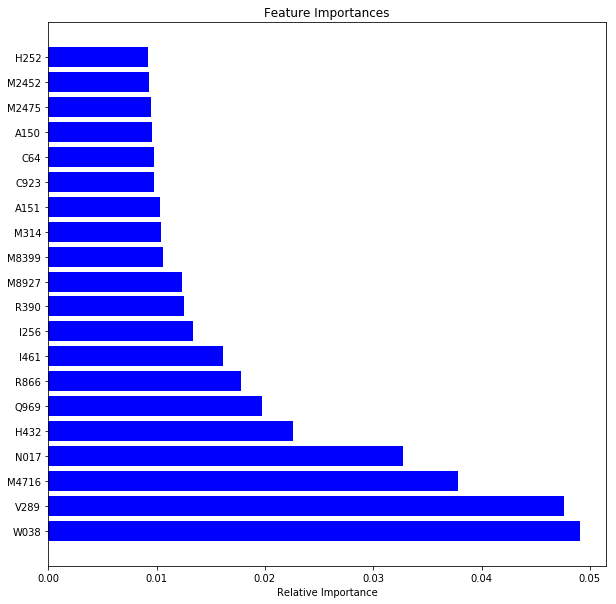

In [21]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)
imp_ind = []
for i in range(len(importances)):
    imp_ind.append((importances[i], indices[i]))
ordered_imp_ind = sorted(imp_ind, key=lambda x: x[0], reverse = True)
ordered_features = []
for i in range(len(ordered_imp_ind)):
    ordered_features.append(X_train.columns[ordered_imp_ind[i][1]])

ordered_importances = []
for i in range(len(ordered_imp_ind)):
    ordered_importances.append(ordered_imp_ind[i][0])

best_features = ordered_features[:20]
best_importances = ordered_importances[:20]
best_indices = list(range(0, 20))

best_feat_df = pd.DataFrame(best_features)
best_feat_df.to_csv('/rds/general/project/hda_students_data/live/Group7/General/Final/best_features_15_sa_com_RF.csv')

plt.figure(figsize= (10,10))
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(best_indices)), best_importances, color='b',
         align='center')
plt.yticks(range(len(best_indices)), [best_features[i] for i in best_indices])
plt.xlabel('Relative Importance')
plt.show()

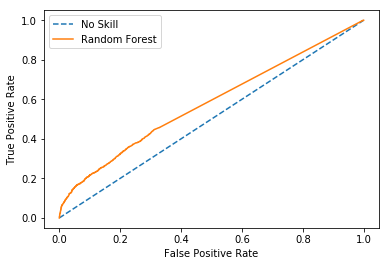

AUC is 0.580499932767776


In [22]:
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
probs = rf_model.predict_proba(X_test)
probs = probs[:, 1]
ns_probs = [0 for _ in range(len(y_test))]
fpr, tpr, _ = roc_curve(y_test, probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='', label='Random Forest')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()
print('AUC is {}'.format(auc(fpr, tpr)))

# Sensitivity analysis covariates

In [ ]:
sa_cov_train = pd.read_csv('/rds/general/project/hda_students_data/live/Group7/General/Final/Sensitivity_analysis/filt_cov_train.csv')
sa_cov_test = pd.read_csv('/rds/general/project/hda_students_data/live/Group7/General/Final/Sensitivity_analysis/filt_cov_test.csv')

In [ ]:
X_train = sa_cov_train.iloc[:,1:]
y_train = sa_cov_train.iloc[:,:1]
X_test = sa_cov_test.iloc[:,1:]
y_test = sa_cov_test.iloc[:,:1]

parameters = {'max_features':['sqrt'], 'n_estimators':[50,100,250],
              'max_depth':range(2,7),'min_samples_leaf':[2,4,6,8], 
              'criterion' :['gini', 'entropy']}

rf_class = GridSearchCV(RandomForestClassifier(random_state = 8),
                        parameters, n_jobs=3)
rf_class.fit(X=X_train, y=y_train)
rf_model = rf_class.best_estimator_

y_pred = rf_model.predict(X_test)


results = get_results(y_test, y_pred)


print('The best parameters are {}'.format(rf_class.best_params_))
print(results)

In [ ]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)
imp_ind = []
for i in range(len(importances)):
    imp_ind.append((importances[i], indices[i]))
ordered_imp_ind = sorted(imp_ind, key=lambda x: x[0], reverse = True)
ordered_features = []
for i in range(len(ordered_imp_ind)):
    ordered_features.append(X_train.columns[ordered_imp_ind[i][1]])

ordered_importances = []
for i in range(len(ordered_imp_ind)):
    ordered_importances.append(ordered_imp_ind[i][0])

best_features = ordered_features[:20]
best_importances = ordered_importances[:20]
best_indices = list(range(0, 20))

best_feat_df = pd.DataFrame(best_features)
best_feat_df.to_csv('/rds/general/project/hda_students_data/live/Group7/General/Final/best_features_sa_cov_RF.csv')

plt.figure(figsize= (10,10))
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(best_indices)), best_importances, color='b',
         align='center')
plt.yticks(range(len(best_indices)), [best_features[i] for i in best_indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
probs = rf_model.predict_proba(X_test)
probs = probs[:, 1]
ns_probs = [0 for _ in range(len(y_test))]
fpr, tpr, _ = roc_curve(y_test, probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='', label='Random Forest')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()
print('AUC is {}'.format(auc(fpr, tpr)))

# Sensitivity analysis 1 comorbidities, covariates

In [39]:
sa_comcov_train1 = pd.read_csv('/rds/general/project/hda_students_data/live/Group7/General/Final/Sensitivity_analysis/filt_train_comcov_01.csv')
sa_comcov_test1 = pd.read_csv('/rds/general/project/hda_students_data/live/Group7/General/Final/Sensitivity_analysis/filt_test_comcov_01.csv')

In [40]:
sa_comcov_train1 = sa_comcov_train1.drop(['X'], axis = 1)
sa_comcov_test1 = sa_comcov_test1.drop(['X'], axis = 1)

In [41]:
X_train = sa_comcov_train1.iloc[:,1:]
y_train = sa_comcov_train1.iloc[:,:1]
X_test = sa_comcov_test1.iloc[:,1:]
y_test = sa_comcov_test1.iloc[:,:1]

parameters = {'max_features':['sqrt'], 'n_estimators':[50,100,250],
              'max_depth':range(2,7),'min_samples_leaf':[2,4,6,8], 
              'criterion' :['gini', 'entropy']}

rf_class = GridSearchCV(RandomForestClassifier(random_state = 8),
                        parameters, n_jobs=3)
rf_class.fit(X=X_train, y=y_train)
rf_model = rf_class.best_estimator_

y_pred = rf_model.predict(X_test)


results = get_results(y_test, y_pred)


print('The best parameters are {}'.format(rf_class.best_params_))
print(results)

/rds/general/user/lr4017/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


The best parameters are {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'n_estimators': 250}
[0.5705296276874672, 0.5803228285933896, 0.5673847695390781, 0.5938647089669639]


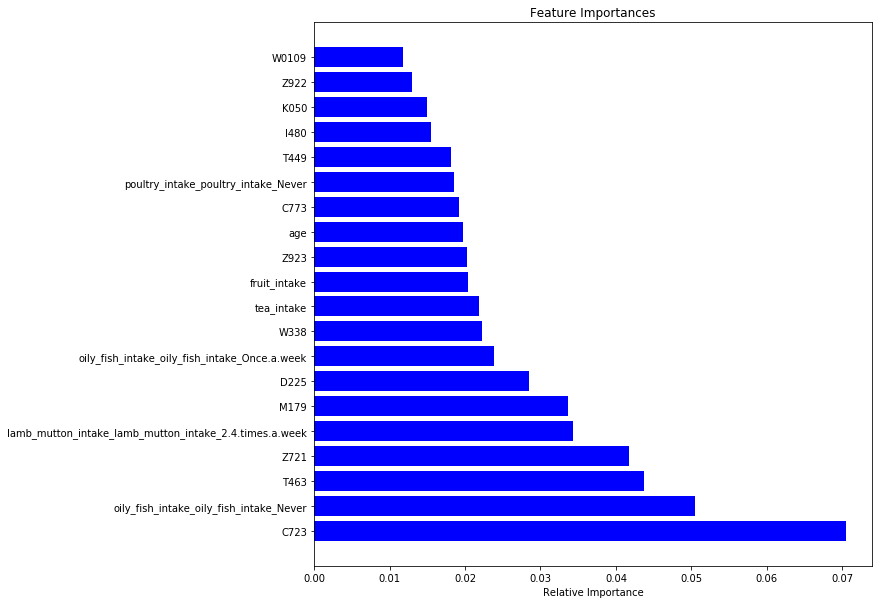

In [42]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)
imp_ind = []
for i in range(len(importances)):
    imp_ind.append((importances[i], indices[i]))
ordered_imp_ind = sorted(imp_ind, key=lambda x: x[0], reverse = True)
ordered_features = []
for i in range(len(ordered_imp_ind)):
    ordered_features.append(X_train.columns[ordered_imp_ind[i][1]])

ordered_importances = []
for i in range(len(ordered_imp_ind)):
    ordered_importances.append(ordered_imp_ind[i][0])

best_features = ordered_features[:20]
best_importances = ordered_importances[:20]
best_indices = list(range(0, 20))

best_feat_df = pd.DataFrame(best_features)
best_feat_df.to_csv('/rds/general/project/hda_students_data/live/Group7/General/Final/best_features_sa_1_comcov_RF.csv')

plt.figure(figsize= (10,10))
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(best_indices)), best_importances, color='b',
         align='center')
plt.yticks(range(len(best_indices)), [best_features[i] for i in best_indices])
plt.xlabel('Relative Importance')
plt.show()

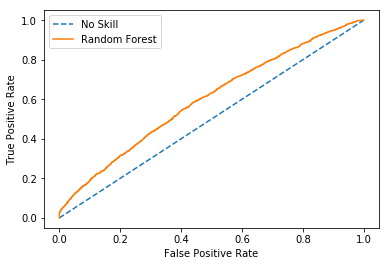

AUC is 0.598523187142889


In [43]:
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
probs = rf_model.predict_proba(X_test)
probs = probs[:, 1]
ns_probs = [0 for _ in range(len(y_test))]
fpr, tpr, _ = roc_curve(y_test, probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='', label='Random Forest')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()
print('AUC is {}'.format(auc(fpr, tpr)))

# Sensitivity analysis 15 comorbidities, covariates

In [12]:
sa_comcov_train15 = pd.read_csv('/rds/general/project/hda_students_data/live/Group7/General/Final/Sensitivity_analysis/filt_train_comcov_15.csv')
sa_comcov_test15 = pd.read_csv('/rds/general/project/hda_students_data/live/Group7/General/Final/Sensitivity_analysis/filt_test_comcov_15.csv')

In [13]:
sa_comcov_train15 = sa_comcov_train15.drop(['X'], axis = 1)
sa_comcov_test15 = sa_comcov_test15.drop(['X'], axis = 1)

In [14]:
X_train = sa_comcov_train15.iloc[:,1:]
y_train = sa_comcov_train15.iloc[:,:1]
X_test = sa_comcov_test15.iloc[:,1:]
y_test = sa_comcov_test15.iloc[:,:1]

parameters = {'max_features':['sqrt'], 'n_estimators':[50,100,250],
              'max_depth':range(2,7),'min_samples_leaf':[2,4,6,8], 
              'criterion' :['gini', 'entropy']}

rf_class = GridSearchCV(RandomForestClassifier(random_state = 8),
                        parameters, n_jobs=3)
rf_class.fit(X=X_train, y=y_train)
rf_model = rf_class.best_estimator_

y_pred = rf_model.predict(X_test)


results = get_results(y_test, y_pred)


print('The best parameters are {}'.format(rf_class.best_params_))
print(results)

/rds/general/user/lr4017/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


The best parameters are {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 250}
[0.5852123754588359, 0.5584705554005023, 0.5969570405727923, 0.5246460409019402]


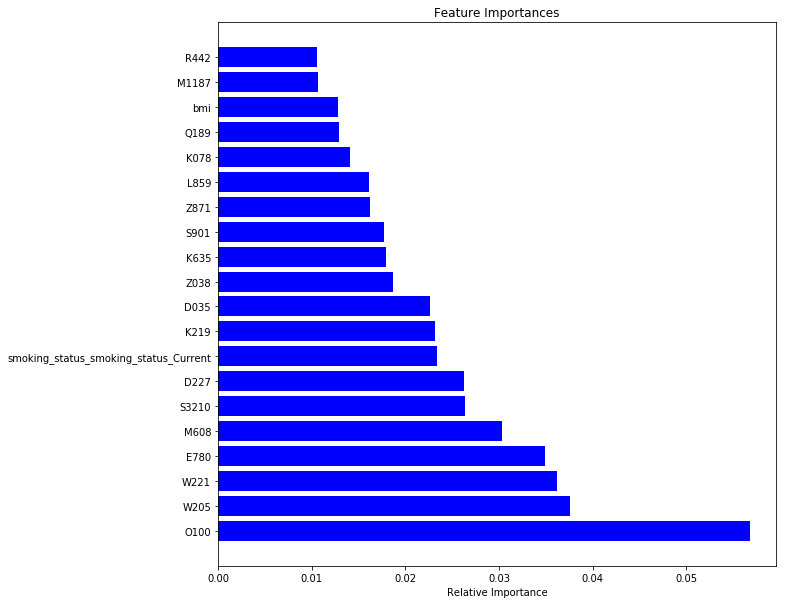

In [15]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)
imp_ind = []
for i in range(len(importances)):
    imp_ind.append((importances[i], indices[i]))
ordered_imp_ind = sorted(imp_ind, key=lambda x: x[0], reverse = True)
ordered_features = []
for i in range(len(ordered_imp_ind)):
    ordered_features.append(X_train.columns[ordered_imp_ind[i][1]])

ordered_importances = []
for i in range(len(ordered_imp_ind)):
    ordered_importances.append(ordered_imp_ind[i][0])

best_features = ordered_features[:20]
best_importances = ordered_importances[:20]
best_indices = list(range(0, 20))

best_feat_df = pd.DataFrame(best_features)
best_feat_df.to_csv('/rds/general/project/hda_students_data/live/Group7/General/Final/best_features_sa_15_comcov_RF.csv')

plt.figure(figsize= (10,10))
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(best_indices)), best_importances, color='b',
         align='center')
plt.yticks(range(len(best_indices)), [best_features[i] for i in best_indices])
plt.xlabel('Relative Importance')
plt.show()

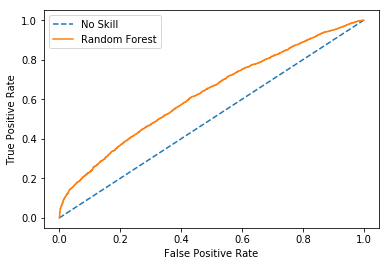

AUC is 0.6269459191689932


In [16]:
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
probs = rf_model.predict_proba(X_test)
probs = probs[:, 1]
ns_probs = [0 for _ in range(len(y_test))]
fpr, tpr, _ = roc_curve(y_test, probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='', label='Random Forest')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()
print('AUC is {}'.format(auc(fpr, tpr)))

# Sensitivity analysis 1 comorbidities, covariates, biomarkers

In [17]:
sa_comcovbio_train1 = pd.read_csv('/rds/general/project/hda_students_data/live/Group7/General/Final/Sensitivity_analysis/filt_train_comcovbio_1.csv')
sa_comcovbio_test1 = pd.read_csv('/rds/general/project/hda_students_data/live/Group7/General/Final/Sensitivity_analysis/filt_test_comcovbio_1.csv')

In [18]:
sa_comcovbio_train1 = sa_comcovbio_train1.drop(['X'], axis = 1)
sa_comcovbio_test1 = sa_comcovbio_test1.drop(['X'], axis = 1)

In [19]:
X_train = sa_comcovbio_train1.iloc[:,1:]
y_train = sa_comcovbio_train1.iloc[:,:1]
X_test = sa_comcovbio_test1.iloc[:,1:]
y_test = sa_comcovbio_test1.iloc[:,:1]

parameters = {'max_features':['sqrt'], 'n_estimators':[50,100,250],
              'max_depth':range(2,7),'min_samples_leaf':[2,4,6,8], 
              'criterion' :['gini', 'entropy']}

rf_class = GridSearchCV(RandomForestClassifier(random_state = 8),
                        parameters, n_jobs=3)
rf_class.fit(X=X_train, y=y_train)
rf_model = rf_class.best_estimator_

y_pred = rf_model.predict(X_test)


results = get_results(y_test, y_pred)


print('The best parameters are {}'.format(rf_class.best_params_))
print(results)

/rds/general/user/lr4017/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


The best parameters are {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'n_estimators': 250}
[0.585431654676259, 0.5897359833877187, 0.5836758661186142, 0.5959232613908872]


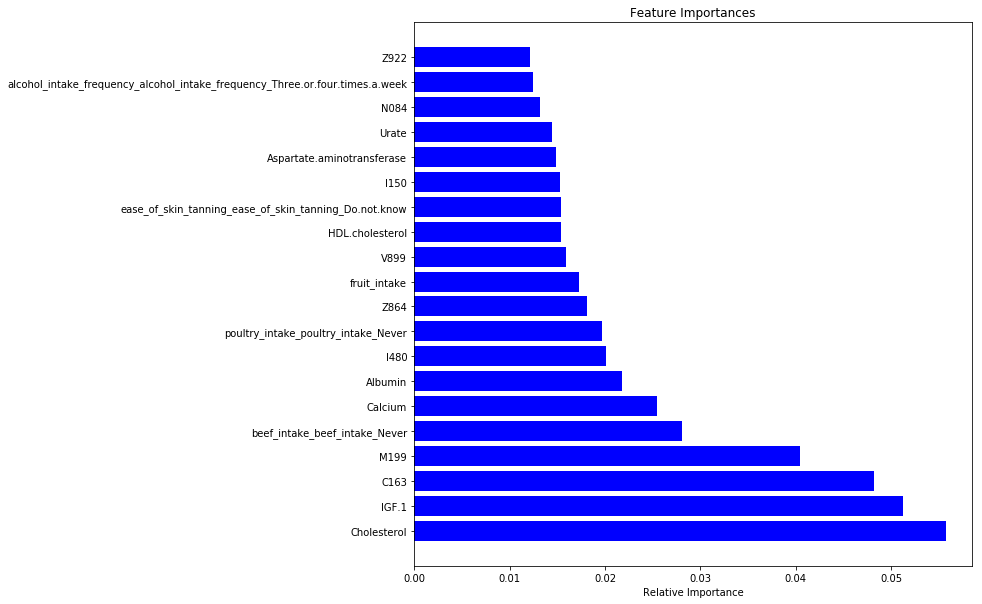

In [20]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)
imp_ind = []
for i in range(len(importances)):
    imp_ind.append((importances[i], indices[i]))
ordered_imp_ind = sorted(imp_ind, key=lambda x: x[0], reverse = True)
ordered_features = []
for i in range(len(ordered_imp_ind)):
    ordered_features.append(X_train.columns[ordered_imp_ind[i][1]])

ordered_importances = []
for i in range(len(ordered_imp_ind)):
    ordered_importances.append(ordered_imp_ind[i][0])

best_features = ordered_features[:20]
best_importances = ordered_importances[:20]
best_indices = list(range(0, 20))

best_feat_df = pd.DataFrame(best_features)
best_feat_df.to_csv('/rds/general/project/hda_students_data/live/Group7/General/Final/best_features_sa_1_comcovbio_RF.csv')

plt.figure(figsize= (10,10))
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(best_indices)), best_importances, color='b',
         align='center')
plt.yticks(range(len(best_indices)), [best_features[i] for i in best_indices])
plt.xlabel('Relative Importance')
plt.show()

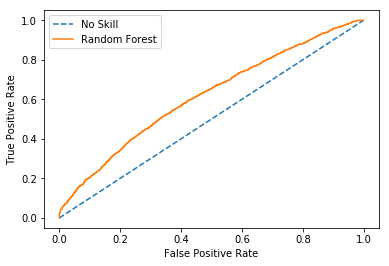

AUC is 0.6162307564020726


In [21]:
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
probs = rf_model.predict_proba(X_test)
probs = probs[:, 1]
ns_probs = [0 for _ in range(len(y_test))]
fpr, tpr, _ = roc_curve(y_test, probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='', label='Random Forest')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()
print('AUC is {}'.format(auc(fpr, tpr)))

# Sensitivity analysis 1-5 comorbidities, covariates, biomarkers

In [22]:
sa_comcovbio_train15 = pd.read_csv('/rds/general/project/hda_students_data/live/Group7/General/Final/Sensitivity_analysis/filt_train_comcovbio_15.csv')
sa_comcovbio_test15 = pd.read_csv('/rds/general/project/hda_students_data/live/Group7/General/Final/Sensitivity_analysis/filt_test_comcovbio_15.csv')

In [23]:
sa_comcovbio_train15 = sa_comcovbio_train15.drop(['X'], axis = 1)
sa_comcovbio_test15 = sa_comcovbio_test15.drop(['X'], axis = 1)

In [24]:
X_train = sa_comcovbio_train15.iloc[:,1:]
y_train = sa_comcovbio_train15.iloc[:,:1]
X_test = sa_comcovbio_test15.iloc[:,1:]
y_test = sa_comcovbio_test15.iloc[:,:1]

parameters = {'max_features':['sqrt'], 'n_estimators':[50,100,250],
              'max_depth':range(2,7),'min_samples_leaf':[2,4,6,8], 
              'criterion' :['gini', 'entropy']}

rf_class = GridSearchCV(RandomForestClassifier(random_state = 8),
                        parameters, n_jobs=3)
rf_class.fit(X=X_train, y=y_train)
rf_model = rf_class.best_estimator_

y_pred = rf_model.predict(X_test)


results = get_results(y_test, y_pred)


print('The best parameters are {}'.format(rf_class.best_params_))
print(results)

/rds/general/user/lr4017/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


The best parameters are {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 250}
[0.6005695443645084, 0.5675807236735356, 0.6186770428015564, 0.5242805755395683]


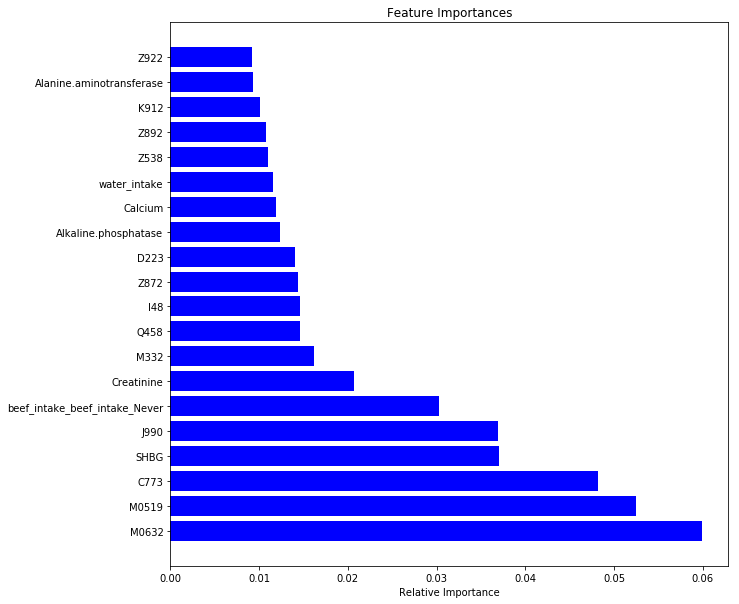

In [25]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)
imp_ind = []
for i in range(len(importances)):
    imp_ind.append((importances[i], indices[i]))
ordered_imp_ind = sorted(imp_ind, key=lambda x: x[0], reverse = True)
ordered_features = []
for i in range(len(ordered_imp_ind)):
    ordered_features.append(X_train.columns[ordered_imp_ind[i][1]])

ordered_importances = []
for i in range(len(ordered_imp_ind)):
    ordered_importances.append(ordered_imp_ind[i][0])

best_features = ordered_features[:20]
best_importances = ordered_importances[:20]
best_indices = list(range(0, 20))

best_feat_df = pd.DataFrame(best_features)
best_feat_df.to_csv('/rds/general/project/hda_students_data/live/Group7/General/Final/best_features_sa_15_comcovbio_RF.csv')

plt.figure(figsize= (10,10))
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(best_indices)), best_importances, color='b',
         align='center')
plt.yticks(range(len(best_indices)), [best_features[i] for i in best_indices])
plt.xlabel('Relative Importance')
plt.show()

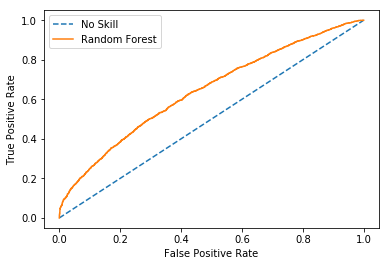

AUC is 0.6425753282266273


In [26]:
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
probs = rf_model.predict_proba(X_test)
probs = probs[:, 1]
ns_probs = [0 for _ in range(len(y_test))]
fpr, tpr, _ = roc_curve(y_test, probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='', label='Random Forest')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()
print('AUC is {}'.format(auc(fpr, tpr)))

In [ ]:
hhjjjhhhjhjopoffyypp

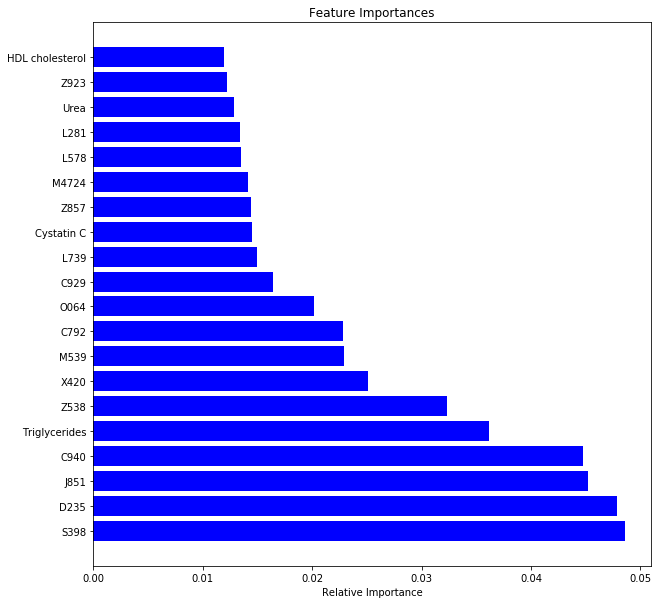

In [35]:
plt.figure(figsize= (10,10))
indices = np.argsort(importances)


plt.title('Feature Importances')
plt.barh(range(len(best_indices)), best_importances, color='b',
         align='center')
plt.yticks(range(len(best_indices)), [best_features[i] for i in best_indices])
plt.xlabel('Relative Importance')
plt.show()

In [5]:
train1 = pd.read_csv('/rds/general/project/hda_students_data/live/Group7/General/Final/Model_dataset/comorbidities_covariates_train1.csv')
test1 = pd.read_csv('/rds/general/project/hda_students_data/live/Group7/General/Final/Model_dataset/comorbidities_covariates_test1.csv')

In [6]:
X_train = train1.iloc[:,1:]
y_train = train1.iloc[:,:1]
X_test = test1.iloc[:,1:]
y_test = test1.iloc[:,:1]

In [7]:
parameters = {'max_features':['sqrt'], 'n_estimators':[50,100,250],
              'max_depth':range(2,7),'min_samples_leaf':[2,4,6,8], 
              'criterion' :['gini', 'entropy']}

rf_class = GridSearchCV(RandomForestClassifier(random_state = 8),
                        parameters, n_jobs=3)
rf_class.fit(X=X_train, y=y_train)
rf_model = rf_class.best_estimator_

y_pred = rf_model.predict(X_test)


results = get_results(y_test, y_pred)


print('The best parameters are {}'.format(rf_class.best_params_))
print(results)

/rds/general/user/lr4017/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


The best parameters are {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 250}
[0.6011549183592194, 0.5768905787917195, 0.6142600089968511, 0.5438072481083234]


In [8]:
features = X_train.columns
features

Index(['B968', 'K20', 'K296', 'K573', 'D122', 'K269', 'N201', 'N23', 'R391',
       'R065',
       ...
       'poultry_intake_poultry_intake_Once.a.week',
       'poultry_intake_poultry_intake_Once.or.more.daily',
       'lamb_mutton_intake_lamb_mutton_intake_2.4.times.a.week',
       'lamb_mutton_intake_lamb_mutton_intake_Do.not.know',
       'lamb_mutton_intake_lamb_mutton_intake_Less.than.once.a.week',
       'lamb_mutton_intake_lamb_mutton_intake_Never',
       'lamb_mutton_intake_lamb_mutton_intake_Once.a.week', 'tea_intake',
       'water_intake', 'family_history_cancer'],
      dtype='object', length=8201)

In [9]:
importances = rf_model.feature_importances_
importances

array([1.96649512e-04, 5.92164871e-04, 8.81910064e-05, ...,
       1.97172112e-03, 2.78728796e-03, 3.05068736e-03])

In [10]:
indices = np.argsort(importances)

In [11]:
imp_ind = []
for i in range(len(importances)):
    imp_ind.append((importances[i], indices[i]))

In [13]:
ordered_imp_ind = sorted(imp_ind, key=lambda x: x[0], reverse = True)

In [14]:
ordered_features = []
for i in range(len(ordered_imp_ind)):
    ordered_features.append(X_train.columns[ordered_imp_ind[i][1]])

ordered_importances = []
for i in range(len(ordered_imp_ind)):
    ordered_importances.append(ordered_imp_ind[i][0])

best_features = ordered_features[:20]
best_importances = ordered_importances[:20]
best_indices = list(range(0, 20))

best_feat_df = pd.DataFrame(best_features)
best_feat_df.to_csv('/rds/general/project/hda_students_data/live/Group7/General/Final/best_features_1_comcov_RF.csv')

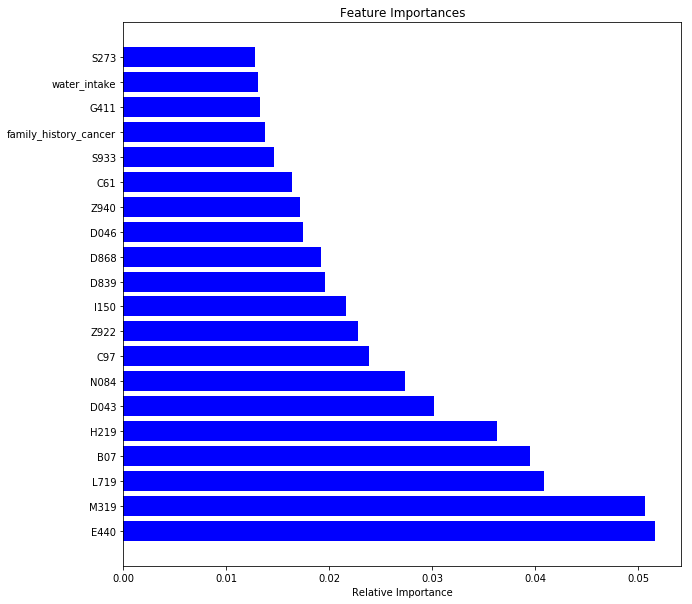

In [15]:
plt.figure(figsize= (10,10))
indices = np.argsort(importances)


plt.title('Feature Importances')
plt.barh(range(len(best_indices)), best_importances, color='b',
         align='center')
plt.yticks(range(len(best_indices)), [best_features[i] for i in best_indices])
plt.xlabel('Relative Importance')
plt.show()